# Monte Carlo Simulation of a Particle Physics Experiment


**Author:** Gavin DeBrun

In [1]:
!wget https://courses.physics.illinois.edu/phys246/fa2020/code/particle_helper.py

--2021-02-28 15:51:49--  https://courses.physics.illinois.edu/phys246/fa2020/code/particle_helper.py
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9503 (9.3K) [application/octet-stream]
Saving to: ‘particle_helper.py’

particle_helper.py  100%[===================>]   9.28K  --.-KB/s    in 0s      

2021-02-28 15:51:52 (70.3 MB/s) - ‘particle_helper.py’ saved [9503/9503]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from particle_helper import Kdecay
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','Axes3D','Kdecay']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
import datetime;datetime.datetime.now()

datetime.datetime(2021, 2, 28, 15, 51, 56, 564131)

## Minimal Simulation of the tracking chamber & Calorimeter

![image.png](https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/beam.png)

![image.png](https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/beam_path.png)

|apparatus element| z |x extent |y extent|
|-----------------|---|---------|--------|
|production target |0  |0        |0       |
|tracker 1         |38 |-0.6 < x < 0.6| -0.6 < y < 0.6 |
|tracker 2| z<sub>tracker1</sub> + 10| -0.7 < x < 0.7 |-0.7 < y < 0.7|
|calorimeter |z<sub>tracker1</sub> + 15 |-0.75 < x < 0.75 |-0.75 < y < 0.75|
|hole in calorimeter |z<sub>tracker1</sub> + 15 |-0.25 < x < 0.25 | -0.25 < y < 0.25|


In [3]:
# instantiate the kaon decay generator class
KDG = Kdecay() 

# now get the kinematic details about a kaon decay. The decay generator returns
# numpy arrays with vertex x, y, z; pi+ four momentum [E/c, px, py, pz];
# pi- four momentum.
vertex, pmu_plus, pmu_minus = KDG.getdecay()
print("vertex={} \npi+={} \npi-={}".format(vertex,pmu_plus,pmu_minus))


Now instantiating the kaon decay generator.
vertex=[0.         0.         3.02008249] 
pi+=[ 5.57551399e+00  3.70837725e-02 -4.33361467e-03  5.57364176e+00] 
pi-=[ 5.44244860e+01 -3.70837725e-02  4.33361467e-03  5.44242942e+01]


### a. Histograms and so forth


<tr>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_11.png" /></td>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_12.png" /></td>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_13.png" /></td>
</tr>
<tr>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_21.png" /></td>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_22.png" /></td>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_23.png" /></td>
</tr>
<tr>
    <td>&nbsp;</td>
    <td><img src="https://courses.physics.illinois.edu/phys246/fa2020/code/images/PP/ans1_32.png" /></td>
    <td>&nbsp;</td>
</tr>


Now instantiating the kaon decay generator.


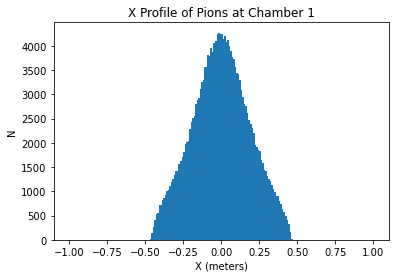

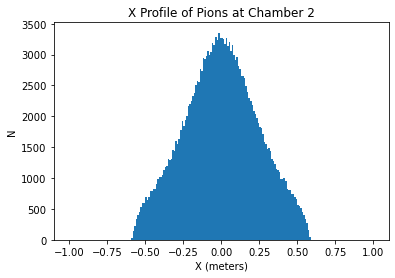

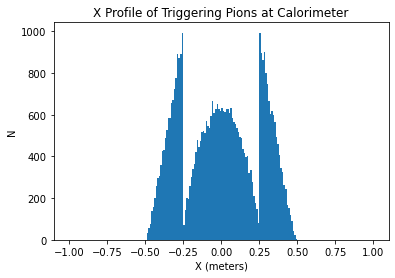

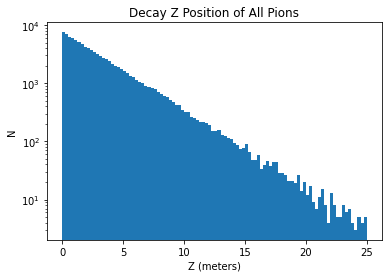

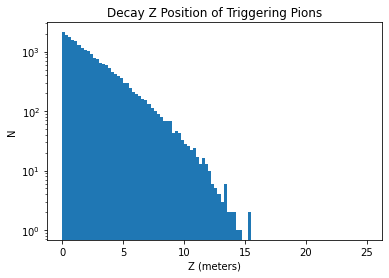

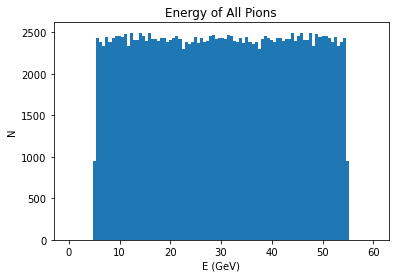

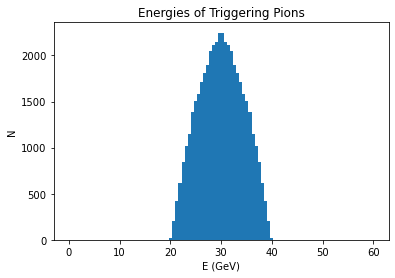

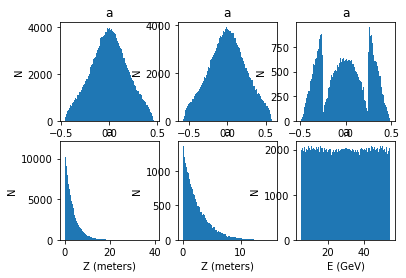

In [4]:
KDG = Kdecay() 

chamber1_z = 38
chamer1_extent = .6
chamber2_z = 48
chamber2_extent = .7
calorimeter_z = 53
calorimeter_extent = .75
hole_extent = .25

#store data about all pions
decay_z_all = []
x_profile_chamber1 = []
x_profile_chamber2= []
all_energies = []

#store data about triggering pions
x_profile_calorimeter = []
triggering_energies = []
decay_z_triggering = []

number_through_hole = 0
number_outside_calorimeter = 0


for i in range(100000):
  vertex, pmu_plus, pmu_minus = KDG.getdecay()

  #distances from decay point to each element
  calorimeter_distance = calorimeter_z - vertex[-1]
  chamber1_distance = chamber1_z - vertex[-1]
  chamber2_distance = chamber2_z - vertex[-1]

  #x values at each element
  pmu_plus_chamber1x =  pmu_plus[1]/pmu_plus[-1] * chamber1_distance
  pmu_plus_chamber2x = pmu_plus[1]/pmu_plus[-1] * chamber2_distance
  pmu_plus_calorimeterx = pmu_plus[1]/pmu_plus[-1] * calorimeter_distance

  pmu_minus_chamber1x = pmu_minus[1]/pmu_minus[-1] * chamber1_distance
  pmu_minus_chamber2x = pmu_minus[1]/pmu_minus[-1] * chamber2_distance
  pmu_minus_calorimeterx = pmu_minus[1]/pmu_minus[-1] * calorimeter_distance

  #y values at each element
  pmu_plus_chamber1y =  pmu_plus[2]/pmu_plus[-1] * chamber1_distance
  pmu_plus_chamber2y = pmu_plus[2]/pmu_plus[-1] * chamber2_distance
  pmu_plus_calorimetery = pmu_plus[2]/pmu_plus[-1] * calorimeter_distance

  pmu_minus_chamber1y = pmu_minus[2]/pmu_minus[-1] * chamber1_distance
  pmu_minus_chamber2y = pmu_minus[2]/pmu_minus[-1] * chamber2_distance
  pmu_minus_calorimetery = pmu_minus[2]/pmu_minus[-1] * calorimeter_distance

  #updating lists
  decay_z_all.append(vertex[-1])
  all_energies.append(pmu_plus[0])
  all_energies.append(pmu_minus[0])
  x_profile_chamber1.append(pmu_plus_chamber1x)
  x_profile_chamber1.append(pmu_minus_chamber1x)
  x_profile_chamber2.append(pmu_plus_chamber2x)
  x_profile_chamber2.append(pmu_minus_chamber2x)

    

  #testing for triggers
  if np.abs(pmu_plus_calorimeterx) < calorimeter_extent and np.abs(pmu_plus_calorimetery) < calorimeter_extent and np.abs(pmu_minus_calorimeterx) < calorimeter_extent and np.abs(pmu_minus_calorimetery) < calorimeter_extent:
    if (np.abs(pmu_plus_calorimeterx) >= hole_extent or np.abs(pmu_plus_calorimetery) >= hole_extent) and (np.abs(pmu_minus_calorimeterx) >= hole_extent or np.abs(pmu_minus_calorimetery) >= hole_extent):

      x_profile_calorimeter.append(pmu_plus_calorimeterx)
      x_profile_calorimeter.append(pmu_minus_calorimeterx)
      triggering_energies.append(pmu_plus[0])
      triggering_energies.append(pmu_minus[0])
      decay_z_triggering.append(vertex[-1])

    #testing too see which/how many went through the hole
    if np.abs(pmu_plus_calorimeterx) < hole_extent and np.abs(pmu_plus_calorimetery) < hole_extent:
      number_through_hole += 1
    if np.abs(pmu_minus_calorimeterx) < hole_extent and np.abs(pmu_minus_calorimetery) < hole_extent:
      number_through_hole += 1
  
  #testing to see which/how many missed the calorimeter entirely
  if np.abs(pmu_plus_calorimeterx) >= calorimeter_extent or np.abs(pmu_plus_calorimetery) >= calorimeter_extent:
    number_outside_calorimeter += 1
  if np.abs(pmu_minus_calorimeterx) >= calorimeter_extent or np.abs(pmu_minus_calorimetery) >= calorimeter_extent:
    number_outside_calorimeter += 1



plt.hist(x_profile_chamber1, bins = 200,range=(-1,1))
plt.title("X Profile of Pions at Chamber 1")
plt.ylabel("N")
plt.xlabel("X (meters)")
plt.show()
plt.hist(x_profile_chamber2, bins = 200,range=(-1,1))
plt.title("X Profile of Pions at Chamber 2")
plt.ylabel("N")
plt.xlabel("X (meters)")
plt.show()
plt.hist(x_profile_calorimeter, bins = 200,range=(-1,1))
plt.title("X Profile of Triggering Pions at Calorimeter")
plt.ylabel("N")
plt.xlabel("X (meters)")
plt.show()
plt.hist(decay_z_all, bins = 100,range=(0,25))
plt.yscale("log")
plt.title("Decay Z Position of All Pions")
plt.ylabel("N")
plt.xlabel("Z (meters)")
plt.show()
plt.hist(decay_z_triggering, bins = 100,range=(0,25))
plt.yscale('log')
plt.title("Decay Z Position of Triggering Pions")
plt.ylabel("N")
plt.xlabel("Z (meters)")
plt.show()
plt.hist(all_energies, bins = 100,range=(0,60))
plt.title("Energy of All Pions")
plt.ylabel("N")
plt.xlabel("E (GeV)")
plt.show()
plt.hist(triggering_energies, bins = 100,range=(0,60))
plt.title("Energies of Triggering Pions")
plt.ylabel("N")
plt.xlabel("E (GeV)")
plt.show()


xaxes = ["X (meters)", "X (meters)","X (meters)", "Z (meters)", "Z (meters)", "E (GeV)"]
yaxes = ["N","N","N","N","N","N"]
titles = ["a","a","a","a","a","a","a"]
data = [x_profile_chamber1, x_profile_chamber2, x_profile_calorimeter, decay_z_all, decay_z_triggering, all_energies]
f,a = plt.subplots(2,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx], bins = 100)
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
plt.show()



### b. Why events fail to satisfy the trigger

In [5]:
print("number of decays: 100000")
print("number of triggers:", len(decay_z_triggering))
print("number of events with pion(s) in the hole:", number_through_hole)
print("number of events with pion(s) wide:", number_outside_calorimeter)
print("target-to-first-tracker distance: 38")

number of decays: 100000
number of triggers: 22708
number of events with pion(s) in the hole: 79083
number of events with pion(s) wide: 0
target-to-first-tracker distance: 38


## Geometrical acceptance

### a. Plotting the occupied region of phase space


Now instantiating the kaon decay generator.


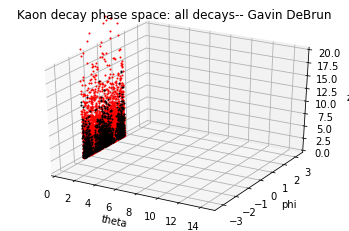

In [58]:
number_of_decays_to_generate = 5000
number_of_triggers = 20000
calorimeter_extent = .75
hole_extent = .25
chamber1_extent = .6
chamber2_extent = .7

def isTrigger(decay_z, pmu_plus, pmu_minus, distance):
  chamber1_z = distance
  chamber2_z = chamber1_z + 10
  calorimeter_z = chamber2_z + 5
  calorimeter_distance = calorimeter_z - decay_z
  pmu_plus_calorimeterx = pmu_plus[1]/pmu_plus[-1] * calorimeter_distance
  pmu_minus_calorimeterx = pmu_minus[1]/pmu_minus[-1] * calorimeter_distance
  pmu_plus_calorimetery = pmu_plus[2]/pmu_plus[-1] * calorimeter_distance
  pmu_minus_calorimetery = pmu_minus[2]/pmu_minus[-1] * calorimeter_distance
  pmu_plus_chamber2x =  pmu_plus[1]/pmu_plus[-1] * chamber2_z
  pmu_plus_chamber2y =  pmu_plus[2]/pmu_plus[-1] * chamber2_z
  pmu_minus_chamber2x =  pmu_minus[1]/pmu_minus[-1] * chamber2_z
  pmu_minus_chamber2y =  pmu_minus[2]/pmu_minus[-1] * chamber2_z
  pmu_plus_chamber1x =  pmu_plus[1]/pmu_plus[-1] * chamber1_z
  pmu_plus_chamber1y =  pmu_plus[2]/pmu_plus[-1] * chamber1_z
  pmu_minus_chamber1x =  pmu_minus[1]/pmu_minus[-1] * chamber1_z
  pmu_minus_chamber1y =  pmu_minus[2]/pmu_minus[-1] * chamber1_z
  
  if np.abs(pmu_plus_chamber1x) < chamber1_extent and np.abs(pmu_plus_chamber1y) < chamber1_extent and np.abs(pmu_minus_chamber1x) < chamber1_extent and np.abs(pmu_minus_chamber1y) < chamber1_extent:
    if np.abs(pmu_plus_chamber2x) < chamber2_extent and np.abs(pmu_plus_chamber2y) < chamber2_extent and np.abs(pmu_minus_chamber2x) < chamber2_extent and np.abs(pmu_minus_chamber2y) < chamber2_extent:
      if np.abs(pmu_plus_calorimeterx) < calorimeter_extent and np.abs(pmu_plus_calorimetery) < calorimeter_extent and np.abs(pmu_minus_calorimeterx) < calorimeter_extent and np.abs(pmu_minus_calorimetery) < calorimeter_extent:
        if (np.abs(pmu_plus_calorimeterx) >= hole_extent or np.abs(pmu_plus_calorimetery) >= hole_extent) and (np.abs(pmu_minus_calorimeterx) >= hole_extent or np.abs(pmu_minus_calorimetery) >= hole_extent):
          return True

def GeneratePhasePlots(distance_to_first_chamber):
  chamber1_z = distance_to_first_chamber
  chamber2_z = chamber1_z + 10
  calorimeter_z = chamber2_z + 5
  KDG = Kdecay()
  phase_space_theta_mrad = np.array([np.nan] * number_of_decays_to_generate)
  phase_space_phi = np.array([np.nan] * number_of_decays_to_generate)
  phase_space_z = np.array([np.nan] * number_of_decays_to_generate)
  event_satisfied_trigger = np.array([False] * number_of_decays_to_generate)

  phase_space_theta_triggers_mrad = np.array([np.nan] * number_of_triggers)
  phase_space_phi_triggers = np.array([np.nan] * number_of_triggers)
  phase_space_z_triggers = np.array([np.nan] * number_of_triggers)


  for i in range(number_of_decays_to_generate):
    vertex, pmu_plus, pmu_minus = KDG.getdecay()
    z = distance_to_first_chamber
    x = pmu_plus[1]/pmu_plus[-1] * z
    y = pmu_plus[2]/pmu_plus[-1] * z
    phi = np.arctan(pmu_plus[1]/pmu_plus[2])
    theta = np.arctan(np.sqrt(pmu_plus[1]**2 + pmu_plus[2]**2)/pmu_plus[-1])
    if isTrigger(vertex[-1], pmu_plus, pmu_minus, distance_to_first_chamber):
      event_satisfied_trigger[i] = True
      phase_space_theta_triggers_mrad[i] = theta
      phase_space_phi_triggers[i] = phi
      phase_space_z_triggers[i] = vertex[-1]
    else:
      phase_space_z[i] = vertex[-1]
      phase_space_theta_mrad[i] = theta
      phase_space_phi[i] = phi

  # now create a (blank) figure and get/set its axes.
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  # set the x, y, and z axis limits of the plot axes
  ax.set_xlim(0., 15.0)
  ax.set_ylim(-3.5, 3.5)
  ax.set_zlim(0, 20) 
  # label the axes and give the plot a title
  ax.set_xlabel("theta")
  ax.set_ylabel("phi")
  ax.set_zlabel("z")
  ax.set_title("Kaon decay phase space: all decays-- Gavin DeBrun") 
  # now make the plot, using small red markers for all decays:
  ax.plot(phase_space_theta_mrad, phase_space_phi, phase_space_z, 'ro', markersize = 1)
  
  # now add into the plot small black markers for triggering events.
  ax.plot(phase_space_theta_triggers_mrad, phase_space_phi_triggers, \
  phase_space_z_triggers, 'ko', markersize = 1)
  plt.show()
GeneratePhasePlots(38)